In [3]:
# =============================================================================
# Cell 1: Imports and Path Definitions
# Purpose: Import necessary libraries and define the file paths to our dataset.
# =============================================================================

import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np


CASIA_PATH = '../data/CASIA2' 

# Define paths to the authentic, tampered, and ground truth directories
authentic_path = os.path.join(CASIA_PATH, 'Au')
tampered_path = os.path.join(CASIA_PATH, 'Tp')
groundtruth_path = os.path.join(CASIA_PATH, 'CASIA 2 Groundtruth')

# Print the paths to verify they are correct
print(f"Base Path: {os.path.abspath(CASIA_PATH)}")
print(f"Authentic Images Path: {os.path.abspath(authentic_path)}")
print(f"Tampered Images Path: {os.path.abspath(tampered_path)}")
print(f"Ground Truth Masks Path: {os.path.abspath(groundtruth_path)}")

Base Path: c:\Users\malek\OneDrive\Documents\GitHub\Forgery-Detection-Project\data\CASIA2
Authentic Images Path: c:\Users\malek\OneDrive\Documents\GitHub\Forgery-Detection-Project\data\CASIA2\Au
Tampered Images Path: c:\Users\malek\OneDrive\Documents\GitHub\Forgery-Detection-Project\data\CASIA2\Tp
Ground Truth Masks Path: c:\Users\malek\OneDrive\Documents\GitHub\Forgery-Detection-Project\data\CASIA2\CASIA 2 Groundtruth


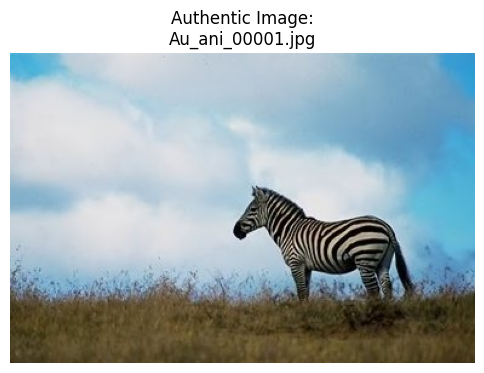

In [4]:
# =============================================================================
# Cell 2: Load and Display a Specific Authentic Image
#
# Purpose: Verify that we can load and view an image from the authentic set.
# We use a specific filename to avoid slowly scanning the entire directory.
# =============================================================================

SPECIFIC_AUTHENTIC_IMAGE = 'Au_ani_00001.jpg'

img_path = os.path.join(authentic_path, SPECIFIC_AUTHENTIC_IMAGE)

try:
    auth_img = Image.open(img_path)
    
    plt.figure(figsize=(6, 6))
    plt.imshow(auth_img)
    plt.title(f"Authentic Image:\n{SPECIFIC_AUTHENTIC_IMAGE}")
    plt.axis('off')
    plt.show()

except FileNotFoundError:
    print(f"ERROR: The file '{SPECIFIC_AUTHENTIC_IMAGE}' was not found.")
    print("Please make sure you have updated the filename with a real one from your 'Au' folder.")

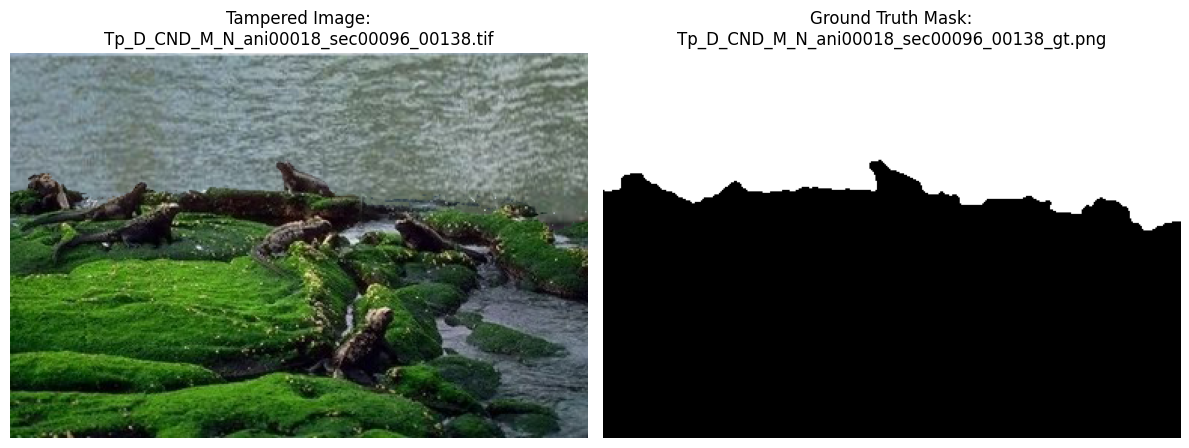

In [6]:
# =============================================================================
# Cell 3: Load a Specific Tampered Image and its Mask
# =============================================================================
# Purpose: Verify we can correctly pair a tampered image with its ground
# truth mask from the separate ground truth folder.
# =============================================================================

BASE_FILENAME = 'Tp_D_CND_M_N_ani00018_sec00096_00138'
TAMPERED_IMG_EXTENSION = '.tif'

# Construct the full filenames
tampered_img_name = BASE_FILENAME + TAMPERED_IMG_EXTENSION
mask_name = BASE_FILENAME + '_gt.png'

# Construct the full paths
tampered_img_path = os.path.join(tampered_path, tampered_img_name)
mask_path = os.path.join(groundtruth_path, mask_name)

# Try to load and display them side-by-side
try:
    tampered_img = Image.open(tampered_img_path).convert('RGB')
    mask_img = Image.open(mask_path)
    
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    
    axes[0].imshow(tampered_img)
    axes[0].set_title(f"Tampered Image:\n{tampered_img_name}")
    axes[0].axis('off')

    axes[1].imshow(mask_img, cmap='gray')
    axes[1].set_title(f"Ground Truth Mask:\n{mask_name}")
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()

except FileNotFoundError:
    print("ERROR: Could not find one or both of the files.")
    print(f"Please check that the following files exist:")
    print(f"  1. Tampered Image: {tampered_img_path}")
    print(f"  2. Mask Image:      {mask_path}")
    print("And that you have updated the BASE_FILENAME and EXTENSION correctly.")

In [7]:
# =============================================================================
# Cell 4: Check Image Properties
#
# Purpose: Investigate the basic properties of our loaded images. This is
# crucial for designing our data preprocessing pipeline later.
# =============================================================================

print("--- Image Properties ---")
if 'auth_img' in locals():
    print(f"Authentic Image ('{SPECIFIC_AUTHENTIC_IMAGE}'):")
    print(f"  - Size (Width, Height): {auth_img.size}")
    print(f"  - Mode (Channels): {auth_img.mode}")
else:
    print("Authentic image not loaded. Please run Cell 2 successfully.")

if 'tampered_img' in locals():
    print(f"\nTampered Image ('{tampered_img_name}'):")
    print(f"  - Size (Width, Height): {tampered_img.size}")
    print(f"  - Mode (Channels): {tampered_img.mode}")
else:
    print("\nTampered image not loaded. Please run Cell 3 successfully.")

if 'mask_img' in locals():
    print(f"\nMask Image ('{mask_name}'):")
    print(f"  - Size (Width, Height): {mask_img.size}")
    print(f"  - Mode (Channels): {mask_img.mode}")
else:
    print("\nMask image not loaded. Please run Cell 3 successfully.")

print("\n--- Key Takeaways ---")
print("1. Image Sizes: Notice if the image sizes are different. Our deep learning model will require all input images to be the same size. This means we will need a resizing or padding step in our data loader.")
print("2. Image Modes: The authentic and tampered images should be 'RGB' (3 channels). The mask is likely 'L' (Luminance/Grayscale, 1 channel) or '1' (binary), which is perfect.")

--- Image Properties ---
Authentic Image ('Au_ani_00001.jpg'):
  - Size (Width, Height): (384, 256)
  - Mode (Channels): RGB

Tampered Image ('Tp_D_CND_M_N_ani00018_sec00096_00138.tif'):
  - Size (Width, Height): (384, 256)
  - Mode (Channels): RGB

Mask Image ('Tp_D_CND_M_N_ani00018_sec00096_00138_gt.png'):
  - Size (Width, Height): (384, 256)
  - Mode (Channels): RGBA

--- Key Takeaways ---
1. Image Sizes: Notice if the image sizes are different. Our deep learning model will require all input images to be the same size. This means we will need a resizing or padding step in our data loader.
2. Image Modes: The authentic and tampered images should be 'RGB' (3 channels). The mask is likely 'L' (Luminance/Grayscale, 1 channel) or '1' (binary), which is perfect.
